https://medium.com/infye/interpretable-computer-vision-25f583a67682


https://jacobgil.github.io/pytorch-gradcam-book/introduction.html#visual-examples

/home/allan/anaconda3/envs/py3torch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


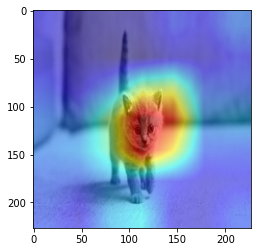

In [7]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import vgg16
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
from torchvision import transforms





rgb_img = Image.open("/home/allan/Downloads/Course/cat.jpg")

rgb_img=np.array(rgb_img.resize((227,227)),np.float32)
rgb_img *= (1.0/rgb_img.max())

convert_tensor = transforms.ToTensor()


model = vgg16(weights=True)
target_layers = [model.features[-1]]


input_tensor = convert_tensor(rgb_img).unsqueeze(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device)


targets = [ClassifierOutputTarget(281)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]


visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

imgplot = plt.imshow(visualization)
plt.show()